In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load the Maternal Health Risk dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")

# Select features for PCA
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
X = df[features]

# Standardize features for  equal scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This correlation heatmap helps spot strong relationships between features. For example, SystolicBP and DiastolicBP are positively correlated, which makes sense since both are blood pressure measurements. 

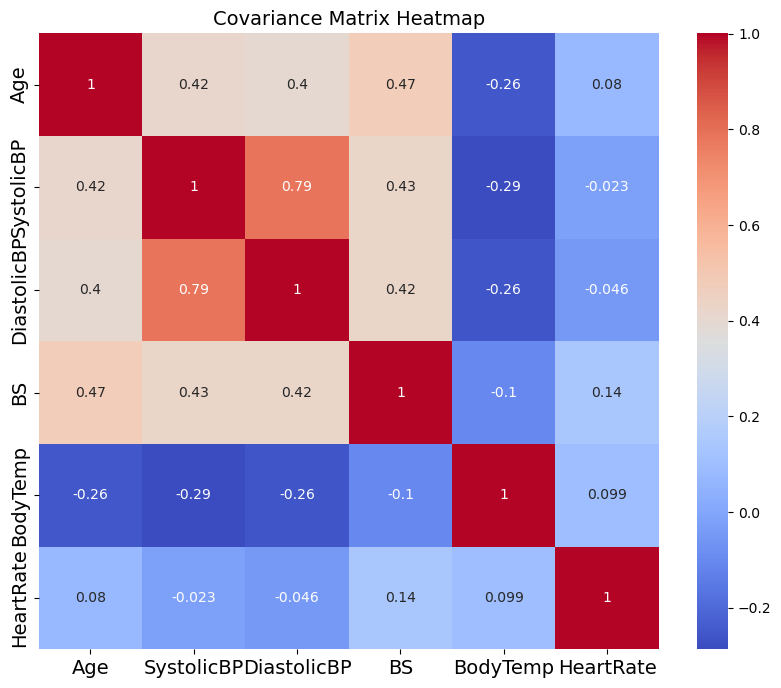

In [18]:
# Compute the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cov_matrix, annot=True, xticklabels=features, yticklabels=features, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Lab5_CindyChitsuwa_CovarianceHeatmap.png')
plt.show()

The bar chart shows how much each principal component actually explains. The higher the bar, the more important that component is.

The heatmap shows how each feature contributes to each component. 
Darker colors mean stronger influence. or example, blood pressure and heart rate have strong weights in the first few components, meaning they play a big role in how the data varies across patients.

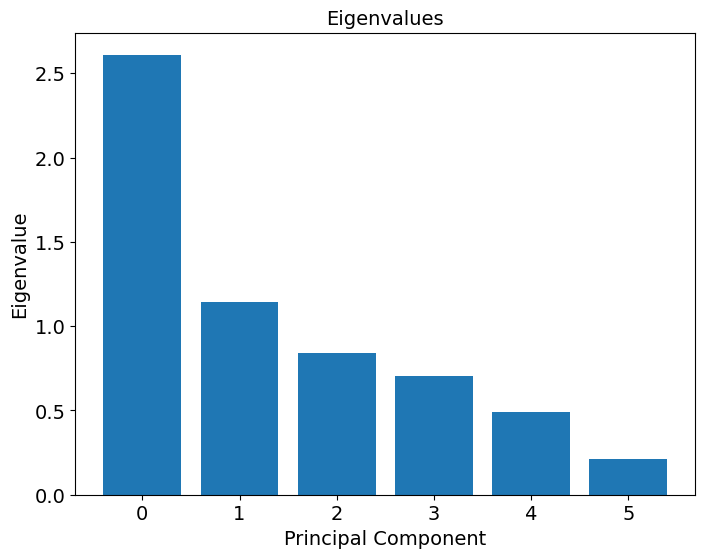

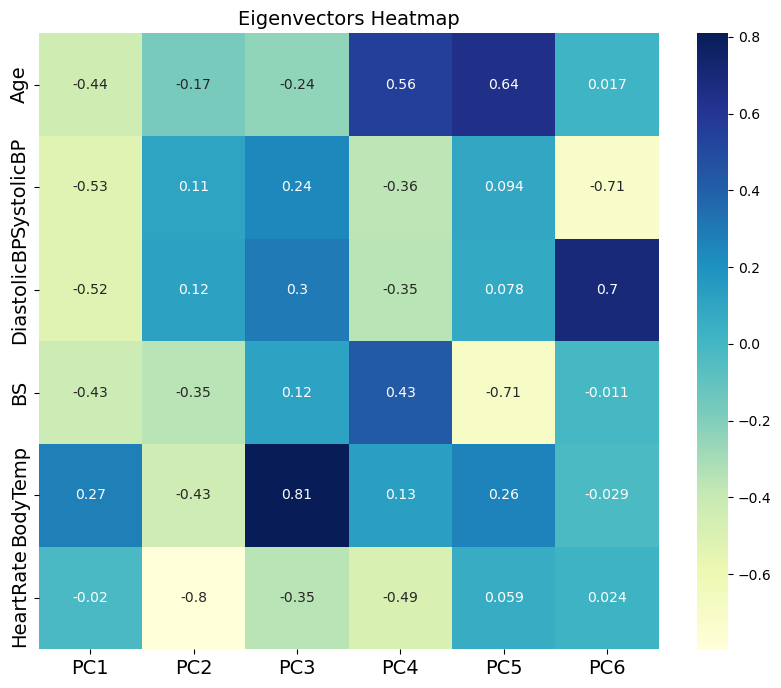

In [23]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Bar chart to visualize eigenvalues
plt.figure(figsize=(8,6))
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.title('Eigenvalues', fontsize=14)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Lab5_CindyChitsuwa_EigenvaluesBar.png')
plt.show()

# Heatmap to visualize eigenvectors
eigenvectors_df = pd.DataFrame(eigenvectors, columns=[f'PC{i+1}' for i in range(len(eigenvectors))], index=features)
plt.figure(figsize=(10,8))
sns.heatmap(eigenvectors_df, annot=True, cmap='YlGnBu')
plt.title('Eigenvectors Heatmap', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Lab5_CindyChitsuwa_EigenvectorsHeatmap.png')
plt.show()

The screen plot shows how much variance is explained by each principal component. This helps decide how many components to keep. In this case, the first two components explain most of the variance.

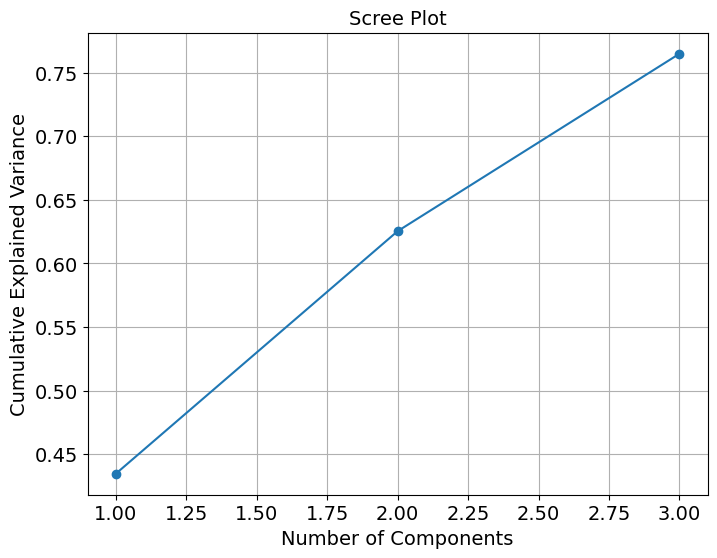

In [25]:
 #Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Scree plot showing cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(range(1, 4), cumulative_variance, marker='o')
plt.title('Scree Plot', fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('Lab5_CindyChitsuwa_ScreePlot.png')
plt.show()

This 2D scatterplot projects the dataset onto the first two principal components. The points are color-coded by RiskLevel to explore any separability between categories.

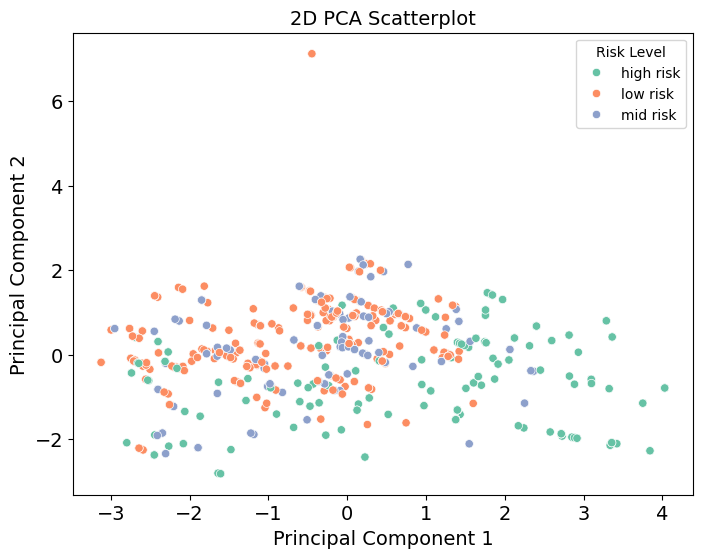

In [30]:
# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['RiskLevel'] = df['RiskLevel']

# 2D scatterplot of PC1 and PC2
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='RiskLevel', palette='Set2')
plt.title('2D PCA Scatterplot', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Risk Level')
plt.savefig('Lab5_CindyChitsuwa_2DScatterplot.png')
plt.show()

This 3D scatterplot adds a third component, giving a fuller view of how the samples are distributed. It’s especially helpful for seeing separation that isn’t obvious in 2D vizualizations.

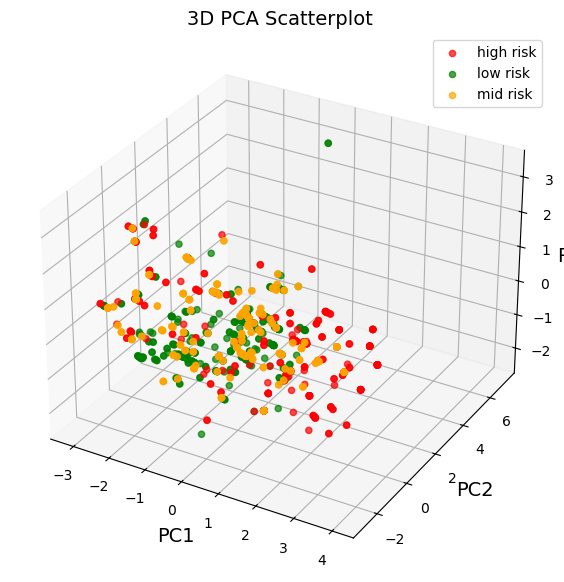

In [32]:
# 3D PCA scatterplot using the first three principal components
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
colors = {'low risk':'green', 'mid risk':'orange', 'high risk':'red'}

# Plot each risk level group
for label in df_pca['RiskLevel'].unique():
    subset = df_pca[df_pca['RiskLevel'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               label=label, color=colors[label], alpha=0.7)

ax.set_title('3D PCA Scatterplot', fontsize=14)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)
ax.legend()
plt.savefig('Lab5_CindyChitsuwa_3DScatterplot.png')
plt.show()